# Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Dataset Processing

Sample Data
--




Class: Covid 19 (299, 299)


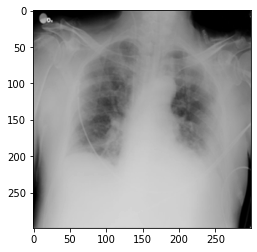

In [ ]:
data_img = cv2.imread("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/COVID Dataset/Covid/COVID-1.png", cv2.IMREAD_GRAYSCALE)
print("Class: Covid 19 "+ str(data_img.shape))
plt.imshow(data_img, cmap="gray")

Class: Lung Opacity (299, 299)


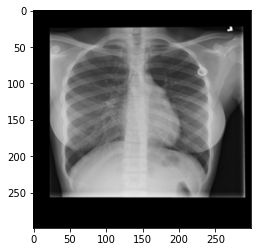

In [ ]:
data_img = cv2.imread("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/COVID Dataset/Normal/Normal-1.png", cv2.IMREAD_GRAYSCALE)
print("Class: Lung Opacity "+ str(data_img.shape))
plt.imshow(data_img, cmap="gray")

Class: Normal (299, 299)


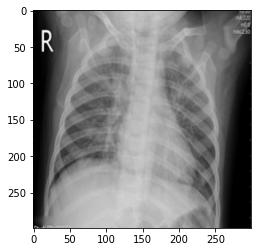

In [ ]:
data_img = cv2.imread("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/COVID Dataset/Pneumonia/Viral Pneumonia-1.png", cv2.IMREAD_GRAYSCALE)
print("Class: Normal "+ str(data_img.shape))
plt.imshow(data_img, cmap="gray")

# Define Path and Classes

In [ ]:
ImgPath = "/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/COVID Dataset/"
Classes = ["Covid", "Normal", "Pneumonia"]

Collect Data
--

In [ ]:
img_size = 224

ImgData = []

def collect_Data():
  for cls in Classes:
    path = os.path.join(ImgPath, cls)
    cls_num = Classes.index(cls)

    count  = 0

    for img in os.listdir(path):
      try:
        data_img= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(data_img, cv2.COLOR_GRAY2RGB)
        data_img = cv2.resize(backtorgb, (img_size, img_size))
        data_img = (data_img/255.0).astype(np.float32)
        ImgData.append([data_img, cls_num])

        count = count + 1
        if count == 150:
          break
          
      except Exception as e:
        pass

In [ ]:
collect_Data() # collect all images and their labels into a list

In [ ]:
print(len(ImgData)) # total number of image data

450


In [ ]:
random.shuffle(ImgData) # shuffle all images to avoid overfitting

In [ ]:
X = []
Y = []
 
for img, label in ImgData:
  X.append(img) # takes all features or images
  Y.append(label) # takes all labels

In [ ]:
X = np.array(X).reshape(-1, img_size, img_size, 3)  # flatten the shape
Y = np.array(Y)

Pickle
--

In [ ]:
pickle_out = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/X.pickle", "wb")
pickle.dump(X, pickle_out, protocol=4) # protocol=4 is used for new version of pickle which can serialize more than 4GB data
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Y.pickle", "wb")
pickle.dump(Y, pickle_out, protocol=4)
pickle_out.close()


# Input Data Sample

Import Required Libraries Again

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Imput Pickled Data
--

In [4]:
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/X.pickle", "rb")
X = pickle.load(pickle_in)
 
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [5]:
print('Data: ', len(X), len(Y))

Data:  450 450


Split Data into Train, Test and Validation Sets
--

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.333, random_state=1) #33.3% data as test and validation data

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=1) #16.7% data as test and 10% as validation data

In [7]:
print('Train:', len(X_train), len(Y_train), '\nTest: ', len(X_test), len(Y_test), '\nValidation: ', len(X_val), len(Y_val))

Train: 300 300 
Test:  75 75 
Validation:  75 75


Sample Data - Train Dataset
--

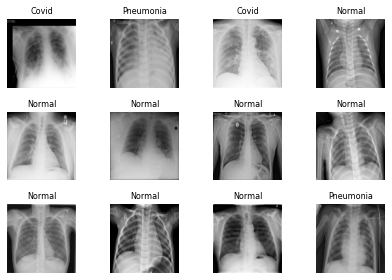

In [8]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title[:-2], fontsize=8)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Classes = ["Covid", "Normal", "Pneumonia"]

images = {str(Classes[Y_train[i]])+format(str(i).zfill(2)): X_train[i] for i in range(12)}

display_multiple_img(images, 3, 4)

# Model Uses for Classification

In [ ]:
model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

# Add Top Layers

In [ ]:
inputs = model.layers[0].input

add_layer = model.layers[-1].output
add_layer = layers.Dense(128)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.Dense(64)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.GlobalAveragePooling2D()(add_layer)
outputs = layers.Dense(3, activation='softmax')(add_layer)

model = keras.Model(inputs, outputs)

In [ ]:
from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  14788803  Non-Trainable:  0


# Compile and Train

In [ ]:
from keras.utils.layer_utils import count_params

def train(gen, models):
    acc = []

    for i in range(len(models)):
        print("Generation: ", gen, " Individual: ", i)
        
        # models[i].compile(
        #     loss = "sparse_categorical_crossentropy",
        #     optimizer = "adam",
        #     metrics = ["accuracy"],
        # )

        trainable_count = count_params(models[i].trainable_weights)
        non_trainable_count = count_params(models[i].non_trainable_weights)

        print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)


        history = models[i].fit(X_train,Y_train, epochs=5, validation_data=(X_val, Y_val))

        filepath = '/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-'+str(gen)+'.hdf5'
        avg_acc = round((history.history['val_accuracy'][-1]+history.history['accuracy'][-1])/2, 4)
        if max(acc, default=-999)<avg_acc:
          models[i].save(filepath)
        acc.append(avg_acc)

        #save history
        pickle_out = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Data/history-"+str(gen)+"-"+str(i)+".pkl", "wb")
        pickle.dump(history, pickle_out, protocol=4) # protocol=4 is used for new version of pickle which can serialize more than 4GB data
        pickle_out.close()
        
    return acc

# Optimization with GA

In [ ]:
no_of_generations = 30
no_of_individuals = 10
no_of_genes = 15
mutate_factor = 0.1
individuals = []

# Initial Population

In [ ]:
import random
def initial_individuals(model):
  init_individuals = []
  i = 0
  while(i < no_of_individuals):
    genes = []
    choice_list = []
    for layer in range(1, len(model.layers)-3):
      choice_list.append(layer)
    for gene in range(no_of_genes):
      n = random.choice(choice_list)
      choice_list.remove(n)
      genes.append(n)
    if genes not in init_individuals:
      init_individuals.append(sorted(genes))
      i = i + 1
  return init_individuals


# Mutation

In [ ]:
def mutate(new_individual, model):
  genes = []

  choice_list = []
  length = len(model.layers)
  for layer in range(1, length - 3):
    if layer not in new_individual:
      choice_list.append(layer)

  for gene in new_individual:
    n = random.random()
    if(n < mutate_factor):
      #Assign random values to certain genes within the maximum acceptable bounds
      k = random.choice(choice_list)
      genes.append(k)
      choice_list.remove(k)
      choice_list.append(gene)
    elif gene not in genes:
      genes.append(gene)
    else:
      k = random.choice(choice_list)
      genes.append(k)
      choice_list.remove(k)
      choice_list.append(gene)
      
  return sorted(genes)

## Crossover

In [ ]:
def crossover(individuals, model):
    new_individuals = []

    new_individuals.append(individuals[0])
    new_individuals.append(individuals[1])
    for i in range(2, no_of_individuals):
        new_individual = []
        if(i < (no_of_individuals - 2)):
            if(i == 2):
                parentA = random.choice(individuals[:3])
                parentB = random.choice(individuals[:3])
            else:
                parentA = random.choice(individuals[:])
                parentB = random.choice(individuals[:])
            for i in range(len(parentA)):
                n = random.random()
                if(n< 0.5):
                    new_individual.append(parentA[i])
                else:
                    new_individual.append(parentB[i])
         
        else:
            new_individual = random.choice(individuals[:])
        new_individual = mutate(new_individual, model)
        while(new_individual in new_individuals):
          new_individual = mutate(new_individual, model)
        new_individuals.append(sorted(new_individual))

    return sorted(new_individuals)

# Evolution

In [ ]:
def evolve(individuals, fitness, model):
  
    sorted_y_idx_list = sorted(range(len(fitness)),key=lambda x:fitness[x])
    individuals = [individuals[i] for i in sorted_y_idx_list ]

    #individuals.reverse()

    new_individuals = crossover(individuals, model)

    return new_individuals

# Model Preparation

In [ ]:
# to initialize the beginning generation
individuals = []
individuals = initial_individuals(model)

In [ ]:
individuals

[[2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21],
 [1, 2, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19],
 [1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17, 19, 20, 21],
 [1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 16, 17, 19, 20, 21],
 [1, 2, 4, 6, 7, 8, 11, 12, 13, 14, 15, 17, 18, 19, 20],
 [1, 2, 4, 5, 6, 7, 9, 10, 11, 13, 14, 17, 18, 19, 21],
 [1, 2, 3, 5, 6, 7, 9, 11, 12, 14, 16, 18, 19, 20, 21],
 [1, 2, 4, 7, 8, 9, 10, 12, 13, 15, 16, 17, 19, 20, 21],
 [1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19],
 [1, 3, 4, 5, 8, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21]]

In [ ]:
import tensorflow as tf

for generation in range(no_of_generations):
    if generation > 0:
      model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-'+str(generation-1)+'.hdf5')
    models = []
    for individual in individuals:
      model.trainable = True
      i = 0
      for layer in model.layers:
        if i in individual:
          layer.trainable = False
        i = i + 1
      model.compile(
            loss = "sparse_categorical_crossentropy",
            optimizer = "adam",
            metrics = ["accuracy"],
        )
      models.append(model)
    print("Generation: ", generation)
    print("Individuals: ", individuals)
    acc = train(generation, models)
    print("Fitness (Average Accuracy): ", acc)

    individuals = evolve(individuals, acc, model)

Generation:  0
Individuals:  [[2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21], [1, 2, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19], [1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17, 19, 20, 21], [1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 16, 17, 19, 20, 21], [1, 2, 4, 6, 7, 8, 11, 12, 13, 14, 15, 17, 18, 19, 20], [1, 2, 4, 5, 6, 7, 9, 10, 11, 13, 14, 17, 18, 19, 21], [1, 2, 3, 5, 6, 7, 9, 11, 12, 14, 16, 18, 19, 20, 21], [1, 2, 4, 7, 8, 9, 10, 12, 13, 15, 16, 17, 19, 20, 21], [1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], [1, 3, 4, 5, 8, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21]]
Generation:  0  Individual:  0
Total:  14788803  Trainable:  2757763  Non-Trainable:  12031040
Epoch 1/5
10/10 [==============================] - 8s 665ms/step - loss: 0.8919 - accuracy: 0.6200 - val_loss: 0.7843 - val_accuracy: 0.6267
Epoch 2/5
10/10 [==============================] - 6s 629ms/step - loss: 0.7555 - accuracy: 0.6867 - val_loss: 0.6451 - val_accuracy: 0.7467
Epoch 3/5
10/10 [========================

# Performance Measures

In [9]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-28.hdf5')

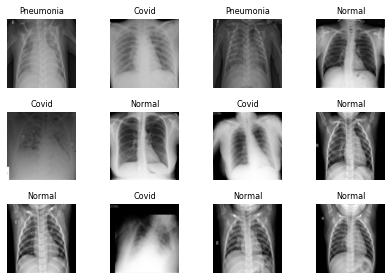

In [ ]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title[:-2], fontsize=8)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Classes = ["Covid", "Normal", "Pneumonia"]

images = {str(Classes[Y_test[i]])+format(str(i).zfill(2)): X_test[i] for i in range(12)}

display_multiple_img(images, 3, 4)

In [10]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [11]:
Y_true = Y_test # true labels

In [12]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


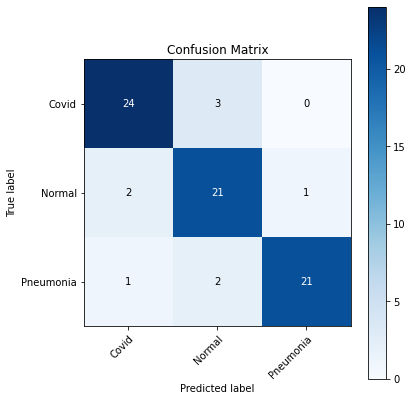

In [13]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


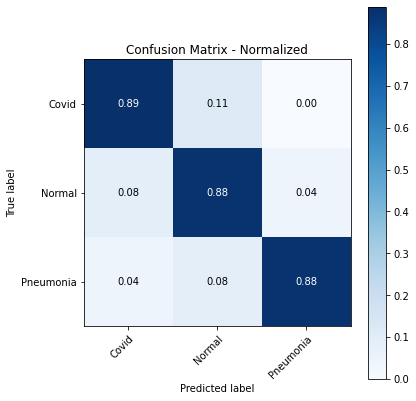

In [14]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 219ms/step - loss: 1.8149 - accuracy: 0.8800


In [ ]:
import pickle
no_of_generations = 30

acc_histories = []
loss_histories = []
val_acc_histories = []
val_loss_histories = []
for gen_itr in range(no_of_generations):
  for model_itr in range(no_of_individuals):
    pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Data/history-"+str(gen_itr)+"-"+str(model_itr)+".pkl", "rb")
    history = pickle.load(pickle_in)

    acc_histories.append(history.history['accuracy'][-1])
    loss_histories.append(history.history['loss'][-1])
    val_acc_histories.append(history.history['val_accuracy'][-1])
    val_loss_histories.append(history.history['val_loss'][-1])

Text(0.5, 1.0, 'Training and Validation Accuracies')

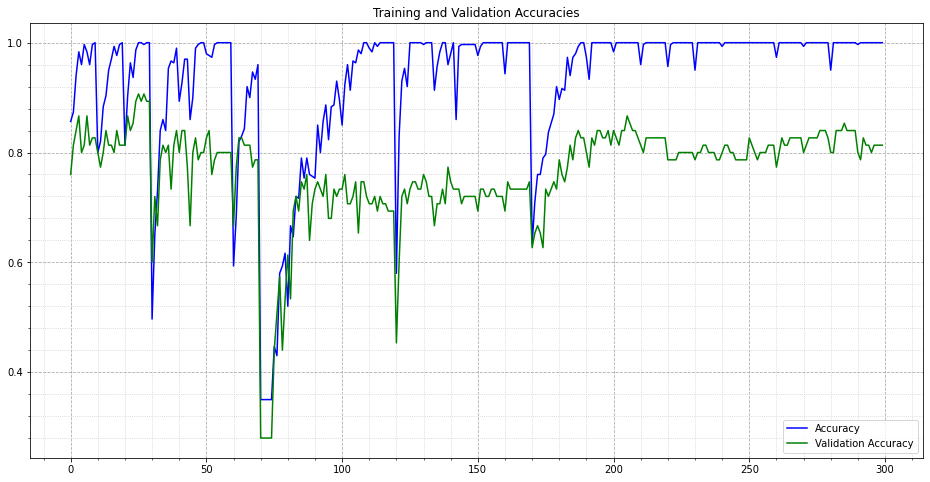

In [ ]:
plt_range = np.arange(0, 30*10, 1)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
# plt.plot(plt_range, list(chain.from_iterable(acc_histories)), label='Accuracy')
# plt.plot(plt_range, list(chain.from_iterable(val_acc_histories)), label='Validation Accuracy')
plt.plot(plt_range, acc_histories, label='Accuracy', color="blue")
plt.plot(plt_range, val_acc_histories, label='Validation Accuracy', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(.20))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

Text(0.5, 1.0, 'Training and Validation Log Losses')

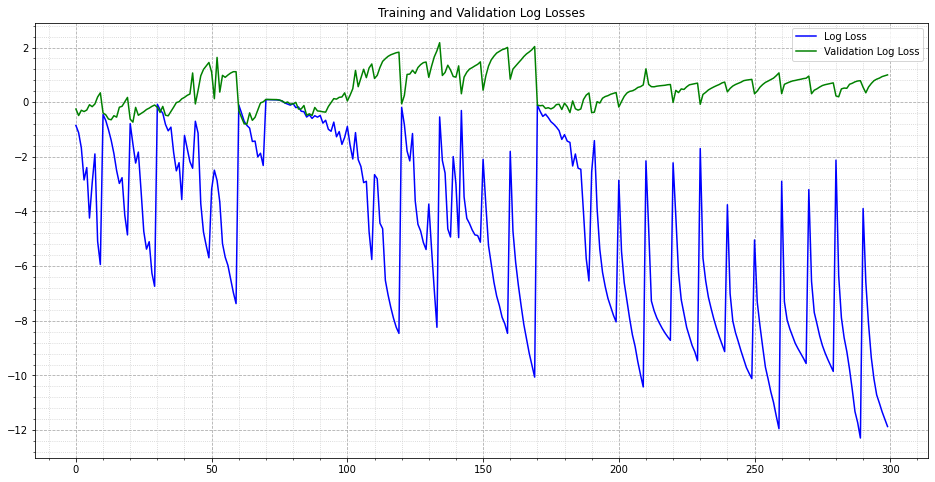

In [ ]:
plt_range = range(30*10)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(plt_range, np.log(loss_histories), label='Log Loss', color="blue")
plt.plot(plt_range, np.log(val_loss_histories), label='Validation Log Loss', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Log Losses')

# Performance Measures - 1

In [ ]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-28.hdf5')

In [ ]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [ ]:
Y_true = Y_test # true labels

In [ ]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


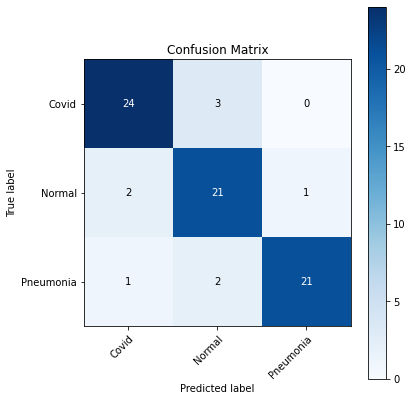

In [15]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


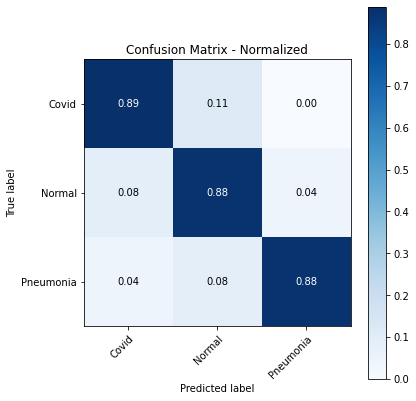

In [16]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 217ms/step - loss: 1.8149 - accuracy: 0.8800


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.88
Precision: 0.8839
Recall: 0.88
F1 Score: 0.881

Report:
              precision    recall  f1-score   support

       Covid       0.89      0.89      0.89        27
      Normal       0.81      0.88      0.84        24
   Pneumonia       0.95      0.88      0.91        24

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



ROC AUC score: 0.9097903050108932


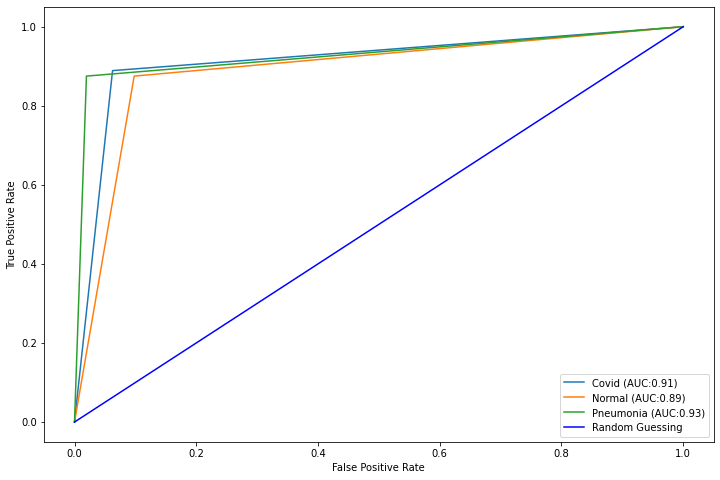

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Performance Measures - 2

In [17]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-3.hdf5')

In [18]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [19]:
Y_true = Y_test # true labels

In [20]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


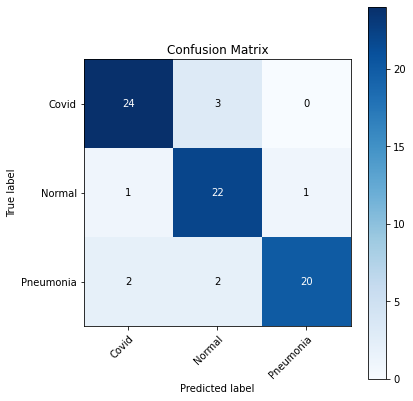

In [21]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


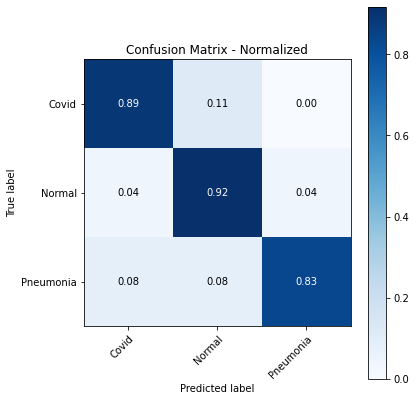

In [22]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 219ms/step - loss: 0.3790 - accuracy: 0.8800


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.88
Precision: 0.8855
Recall: 0.88
F1 Score: 0.8805

Report:
              precision    recall  f1-score   support

       Covid       0.89      0.89      0.89        27
      Normal       0.81      0.92      0.86        24
   Pneumonia       0.95      0.83      0.89        24

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



ROC AUC score: 0.9097903050108932


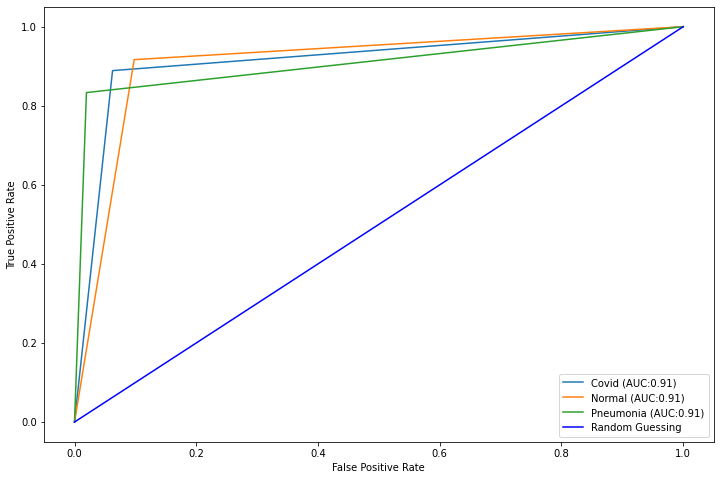

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Performance Measures - 3

In [23]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-2.hdf5')

In [24]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [25]:
Y_true = Y_test # true labels

In [26]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


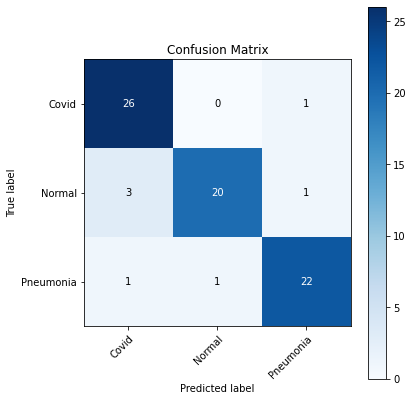

In [27]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


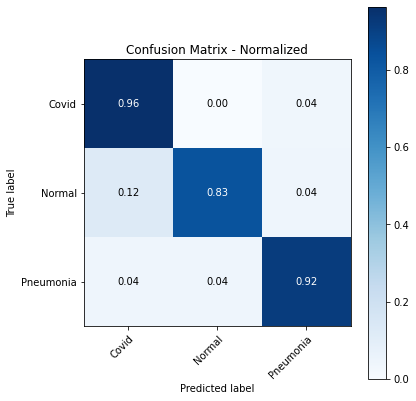

In [28]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 229ms/step - loss: 0.2045 - accuracy: 0.9067


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.9067
Precision: 0.9101
Recall: 0.9067
F1 Score: 0.9062

Report:
              precision    recall  f1-score   support

       Covid       0.87      0.96      0.91        27
      Normal       0.95      0.83      0.89        24
   Pneumonia       0.92      0.92      0.92        24

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.91        75
weighted avg       0.91      0.91      0.91        75



ROC AUC score: 0.9284676833696442


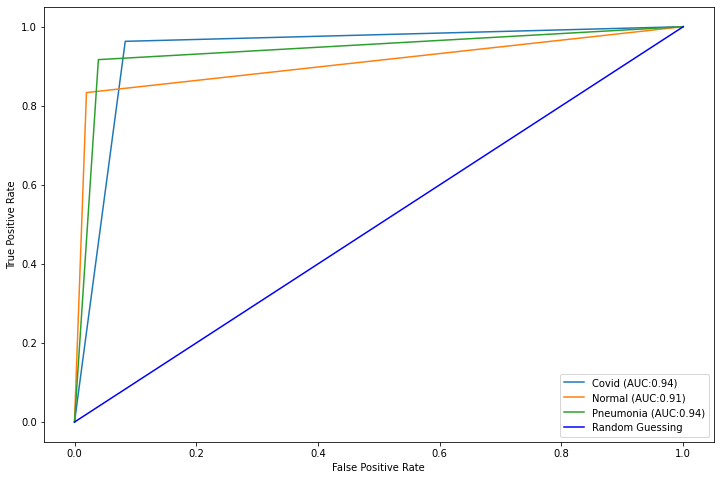

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()